> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Luciano Belo de Alcântara Júnior
* **Matrícula:**  3897

# Aula Prática 10
## Aprendizado de Máquina Não-Supervisionado - Clustering
**Objetivo:** Utilizar a biblioteca scikit-learn para treinar e testar modelos de aprendizado não-supervisionado

**Pré-requisitos:** Linguagem de programação Python, Linux, estatística

**Meta**: Ao final da prática, o aluno será capaz de preparar dados e criar modelos de agrupamento

In [46]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p10/weatherHistory.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-07-24 02:19:55--  https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p10/weatherHistory.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16294377 (16M) [text/plain]
Saving to: ‘weatherHistory.csv.2’

weatherHistory.csv. 100%[===================>]  15.54M  --.-KB/s    in 0.07s   

2022-07-24 02:19:55 (238 MB/s) - ‘weatherHistory.csv.2’ saved [16294377/16294377]



In [47]:
import pandas as pd
import numpy as np

from sklearn import datasets, cluster

import matplotlib.pyplot as plt
import seaborn as sns

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_10 import *

print("Setup complete.")

Setup complete.


------
## Roteiro

### Ler o conjunto de dados
O conjunto de dados que iremos utilizar é o **iris dataset**, que é um dataset clássico no treinamento em Inteligência Artificial. Os dados estão disponíveis diretamente na biblioteca `scikit-learn`.

In [48]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))

# Converte a coluna target para int
iris_df['target'] = iris_df['target'].astype('int64')

In [49]:
X_columns = [u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)', u'petal width (cm)']
X = iris_df[X_columns]

### Visualizar os dados

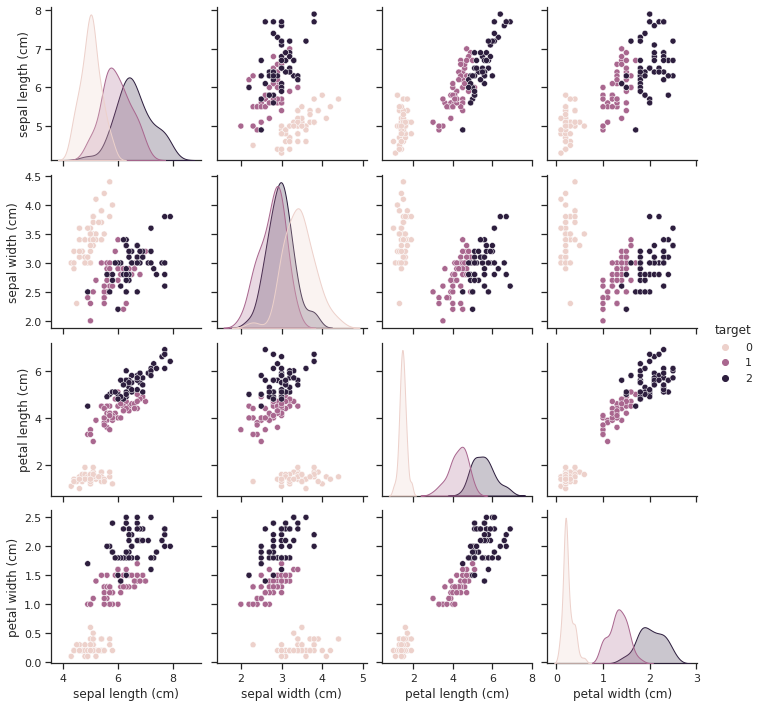

In [24]:
sns.set(style='ticks')
sns.pairplot(iris_df, hue='target')
plt.show()

### Agrupar os dados utilizando o `K-Means`

Com 3 clusters.

In [50]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

KMeans(n_clusters=3)

### Comparar os centros das classes reais com os grupos identificados pelo k-means

**Atenção:** a ordem dos grupos do k-means não é necessariamente a mesma do target (0, 1 e 2). Temos que olhar para um grupo, independente da ordem do label que o k-means atribuiu.

In [51]:
print(k_means.cluster_centers_)

iris_df.groupby('target')[X_columns]

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


### Visualizar os grupos em termos de dois atributos
**Atenção**: as cores dos dois gráficos podem ser diferentes, pois o rótulo do agrupamento do k-means pode não ser igual ao do target real. Nesses gráficos, o objetivo é visualizar os grupos, sem se atentar para a cor.

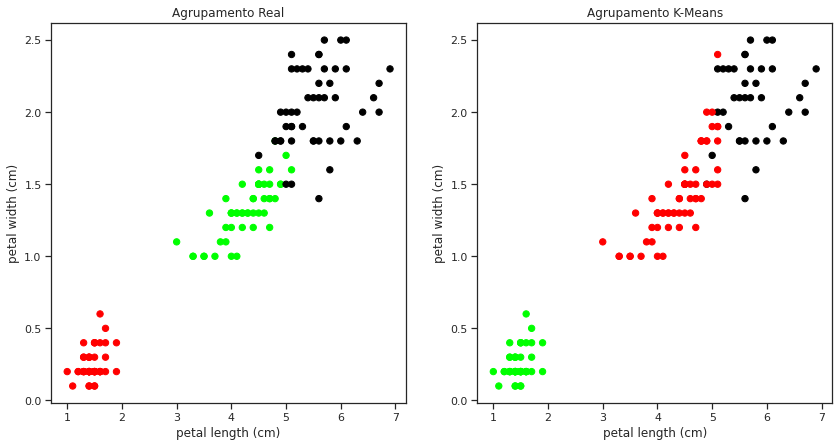

In [52]:
# Ajusta o tamanho do gráfico a ser plotado
plt.figure(figsize=(14, 7))

cmap_real = np.array(['red', 'lime', 'black'])
cmap_group = np.array(['purple', 'orange', 'green'])

# Agrupamentos originais/reais
plt.subplot(1, 2, 1)
plt.scatter(x=iris_df[u'petal length (cm)'], y=iris_df[u'petal width (cm)'], c=cmap_real[iris_df[u'target']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# Agrupamentos originais/reais
plt.subplot(1, 2, 2)
plt.scatter(x=iris_df[u'petal length (cm)'], y=iris_df[u'petal width (cm)'], c=cmap_real[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

----
# Atividades

Utilizar o conjunto de dados weatherHistory.csv, que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. Teste pelo menos três algoritmos e responda:

## 1. Leia o arquivo `weatherHistory.csv`
Armazene-os nas variável `df`. 

Chame a função `q1.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q1.hint()`

In [7]:
# q1.hint()

df = pd.read_csv("weatherHistory.csv")
display(df)

q1.check()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



### Transformar categóricos em numéricos

In [8]:
df['Precip Type'] = df['Precip Type'].apply(lambda x: 1 if x == 'rain' else 0)

### Visualizando os dados

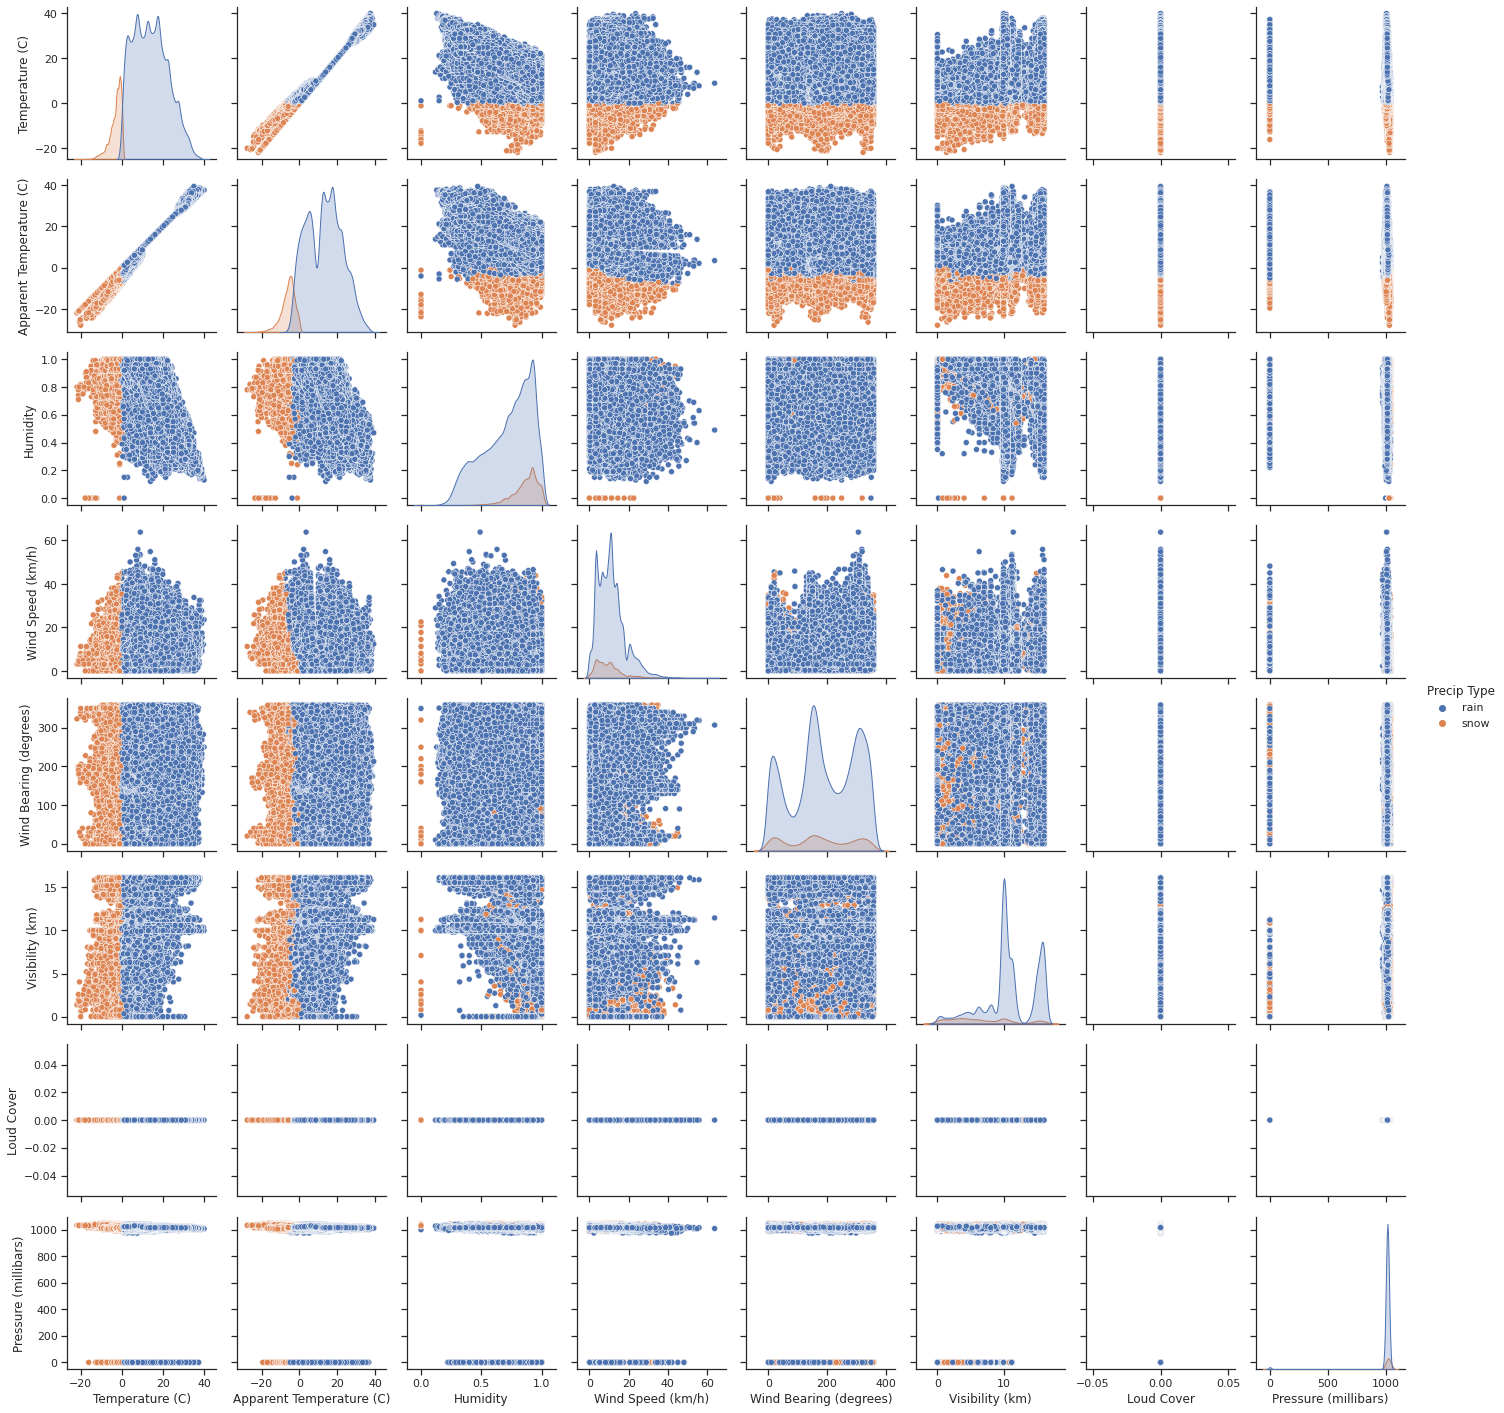

In [40]:
sns.set(style='ticks')
sns.pairplot(df, hue='Precip Type')
plt.show()

## 2. Utilize o K-means para separar os dados em grupos distintos, desconsiderando o tipo de precipitação. 

Plote quaisquer gráficos que você julgue utéis para visualizar os grupos.

Essa questão não possui verificação automática mas você pode pedir dicas com `q2.hint()`

In [14]:
# Resposta da 2

X = df[["Temperature (C)","Apparent Temperature (C)",	"Humidity", "Wind Speed (km/h)",	"Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"	]]
Y = df["Precip Type"]

k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)

# q2.hint()

KMeans(n_clusters=2)

### Comparar os centros das classes reais com os grupos identificados pelo k-means

In [94]:
print(k_means.cluster_centers_)

[[ 1.19492836e+01  1.08783313e+01  7.34964535e-01  1.07843068e+01
   1.87428015e+02  1.03818885e+01  1.01681414e+03]
 [ 1.07057928e+01  9.13331177e+00  7.30054348e-01  1.27563000e+01
   1.93510093e+02  7.79356250e+00 -9.32232069e-12]]


## 3. Veja se é possível associar cada grupo gerado pelo K-means a um tipo de precipitação diferente, olhando para o tipo de precipitação real.
Plote quaisquer gráficos que você julgue utéis para visualizar os grupos.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

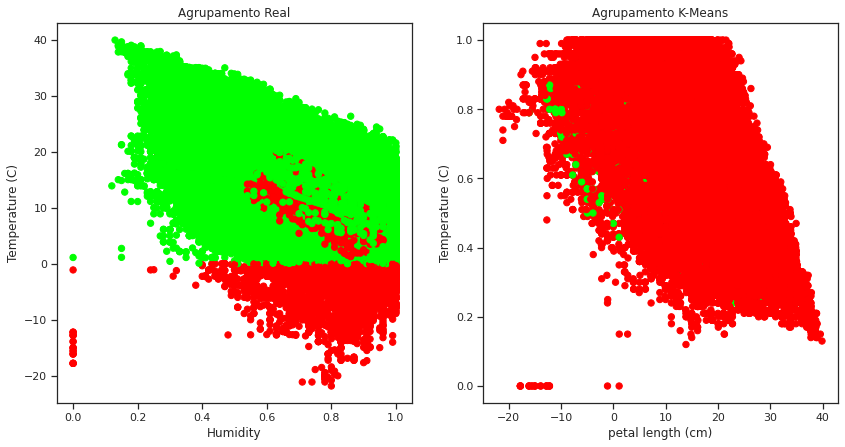

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Revisite o roteiro e faça gráficos parecidos com os que estão lá.
(Para outra dica, chame `.hint(2)`)

In [96]:
# Resposta da 3.1

plt.figure(figsize=(14, 7))

cmap_real = np.array(['red', 'lime', 'black'])
cmap_group = np.array(['purple', 'orange', 'green'])

x1_plt = df[u'Humidity']
y1_plt = df[u'Temperature (C)']
c1_plt = df[u'Precip Type']

# Agrupamentos originais/reais
plt.subplot(1, 2, 1)
plt.scatter(x=x1_plt, y=y1_plt, c=cmap_real[c1_plt], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')


x2_plt = df['Temperature (C)']
y2_plt = df['Humidity']
c2_plt = k_means.labels_

# Agrupamentos originais/reais
plt.subplot(1, 2, 2)
plt.scatter(x=x2_plt, y=y2_plt, c=cmap_real[c2_plt], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('petal length (cm)')
plt.ylabel('Temperature (C)')

plt.show()

q3.hint()

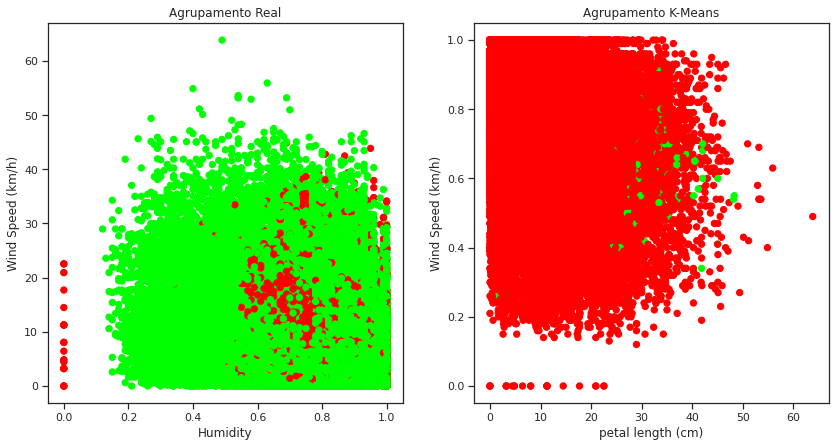

In [99]:
# Resposta da 3.2

plt.figure(figsize=(14, 7))

cmap_real = np.array(['red', 'lime', 'black'])
cmap_group = np.array(['purple', 'orange', 'green'])

x1_plt = df[u'Humidity']
y1_plt = df[u'Wind Speed (km/h)']
c1_plt = df[u'Precip Type']

# Agrupamentos originais/reais
plt.subplot(1, 2, 1)
plt.scatter(x=x1_plt, y=y1_plt, c=cmap_real[c1_plt], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed (km/h)')


x2_plt = df['Wind Speed (km/h)']
y2_plt = df['Humidity']
c2_plt = k_means.labels_

# Agrupamentos originais/reais
plt.subplot(1, 2, 2)
plt.scatter(x=x2_plt, y=y2_plt, c=cmap_real[c2_plt], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('petal length (cm)')
plt.ylabel('Wind Speed (km/h)')

plt.show()

Percebe-se a partir dos dois conjuntos de gráficos anteriores, que a relação entre os dados reais e os k-means é fraca.

## 4. Faça testes com diferentes atributos para verificar se existem sub-conjuntos de atributos mais adequados para agrupar os dados

Explore **pelo menos** quatro cenários distintos. Utilize o [cálculo da silhueta](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) para verificar a qualidade dos grupos obtidos. 

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

In [54]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

In [115]:
df.drop("Formatted Date",axis=1)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,Partly Cloudy,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,Partly Cloudy,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,Partly Cloudy,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Tente visualizar a correlação de Pearson e utilizar as features com maior correlação com a precipitação
(Para outra dica, chame `.hint(2)`)

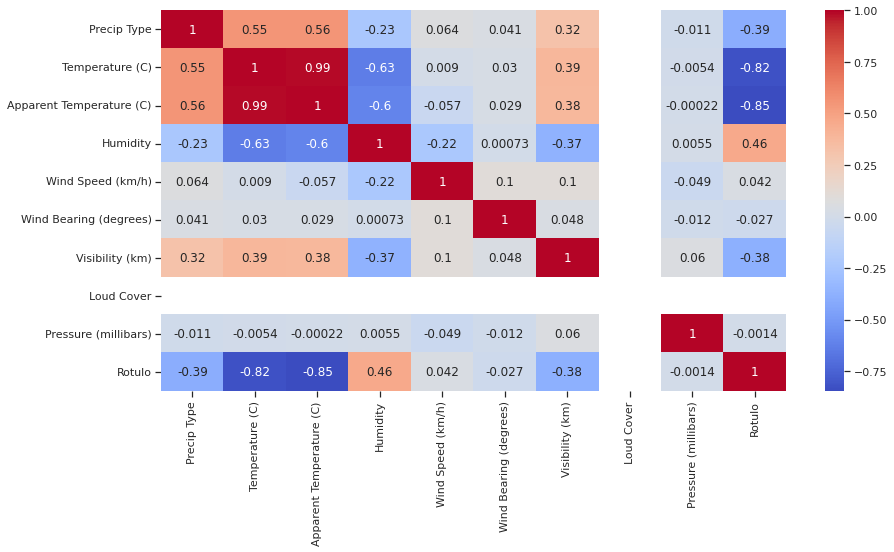

In [116]:
q4.hint()

df_copy = df.copy()
df_copy['Rotulo'] = k_means.labels_

plt.figure(figsize=(14, 7))
pearson = df_copy.corr()
sns.heatmap(pearson, annot=True, cmap='coolwarm')

plt.show()

### Resposta da 4: - Cenário 1

**Cenário:** Apparent Temperature(C) - Humidity

**Justificativa:** Relação entre os dois atributos

In [117]:
# Resposta da 4: - Cenário 1
# Faça o código do primeiro Cenário da 4. aqui!

columns = ['Apparent Temperature (C)', 'Humidity']
k_means = cluster.KMeans(n_clusters = 2).fit(df[columns])

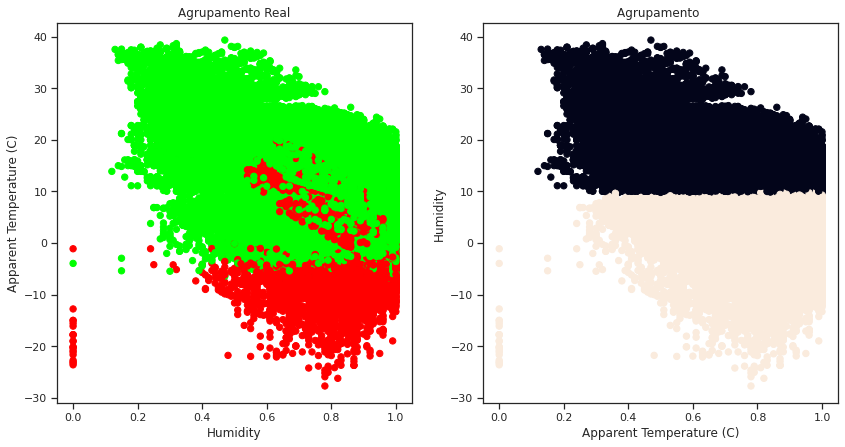

In [118]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(x=df[u'Humidity'], y=df[u'Apparent Temperature (C)'], c=cmap_real[df['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Humidity'], y=df['Apparent Temperature (C)'], c=k_means.labels_, s=40)
plt.title('Agrupamento ')
plt.xlabel('Apparent Temperature (C)')
plt.ylabel("Humidity")

plt.show()

In [120]:
silhouette = metrics.silhouette_score(X, k_means.labels_)
silhouette

0.030845388438514018

### Resposta da 4: - Cenário 2

**Cenário:** Visibility (km) - Humidity

**Justificativa:** Relação entre os dois atributos

In [122]:
# Resposta da 4: - Cenário 2
# Faça o código do segundo Cenário da 4. aqui!

columns = ['Visibility (km)', 'Humidity']
k_means = cluster.KMeans(n_clusters = 2).fit(df[columns])

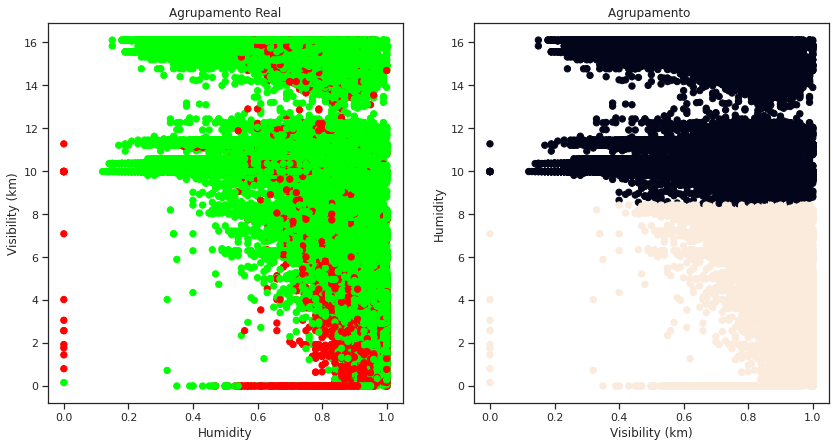

In [123]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(x=df[u'Humidity'], y=df[u'Visibility (km)'], c=cmap_real[df['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Visibility (km)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Humidity'], y=df['Visibility (km)'], c=k_means.labels_, s=40)
plt.title('Agrupamento ')
plt.xlabel('Visibility (km)')
plt.ylabel("Humidity")

plt.show()

In [124]:
silhouette = metrics.silhouette_score(X, k_means.labels_)
silhouette

0.037173470392209626

### Resposta da 4: - Cenário 3

**Cenário:** Temperature(C) - Humidity

**Justificativa:** Relação entre os dois atributos

In [125]:
# Resposta da 4: - Cenário 3
# Faça o código do terceiro Cenário da 4. aqui!

columns = ['Temperature (C)', 'Humidity']
k_means = cluster.KMeans(n_clusters = 2).fit(df[columns])

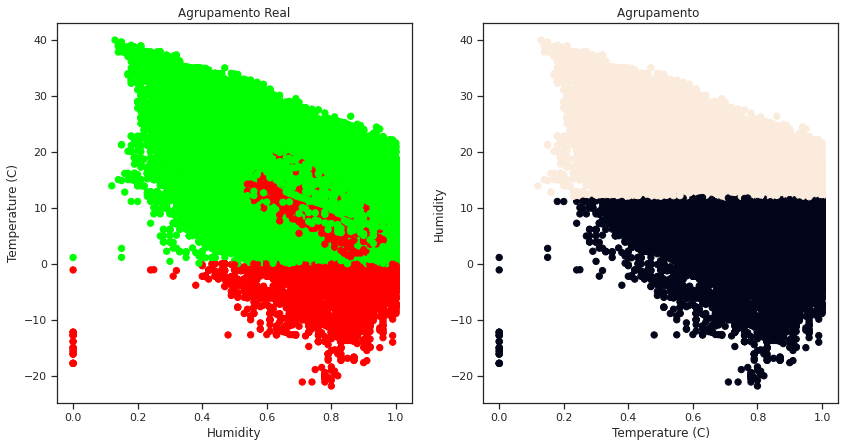

In [126]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(x=df[u'Humidity'], y=df[u'Temperature (C)'], c=cmap_real[df['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Humidity'], y=df['Temperature (C)'], c=k_means.labels_, s=40)
plt.title('Agrupamento ')
plt.xlabel('Temperature (C)')
plt.ylabel("Humidity")

plt.show()

In [127]:
silhouette = metrics.silhouette_score(X, k_means.labels_)
silhouette

0.029270572234443393

### Resposta da 4: - Cenário 4

**Cenário:** Humidity - Wind Speed (km/h)

**Justificativa:** Relação entre os dois atributos

In [128]:
# Resposta da 4: - Cenário 4
# Faça o código do quarto Cenário da 4. aqui!

columns = ['Wind Speed (km/h)', 'Humidity']
k_means = cluster.KMeans(n_clusters = 2).fit(df[columns])

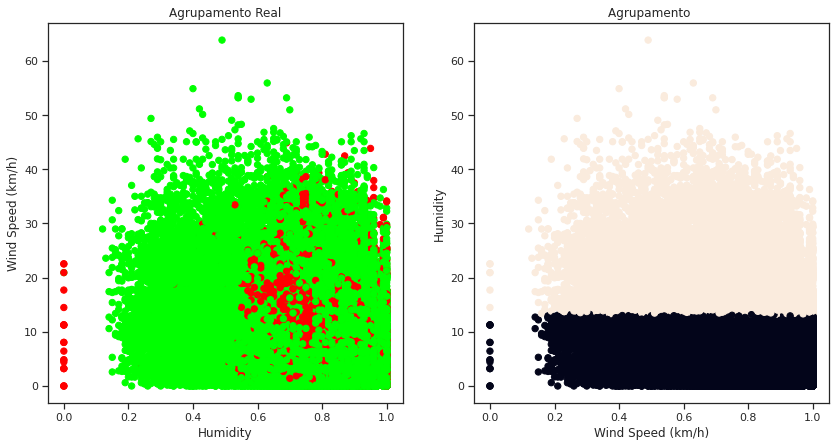

In [129]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(x=df[u'Humidity'], y=df[u'Wind Speed (km/h)'], c=cmap_real[df['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Humidity'], y=df['Wind Speed (km/h)'], c=k_means.labels_, s=40)
plt.title('Agrupamento ')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel("Humidity")

plt.show()

In [130]:
silhouette = metrics.silhouette_score(X, k_means.labels_)
silhouette

0.02679655098162921

## 5. A partir dos resultados da Questão 4. é possível observar que o coeficiente de silhueta está associado a um melhor agrupamento, ao se comparar com os dados reais?
Justifique sua resposta completamente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

### Resposta da 5

A partir da tabela abaixo podemos inferir que o melhor cenário é `Humidity - Wind Speed (km/h)`, enquanto o pior é `Visibility (km) - Humidity`


In [ ]:
q5.hint()

Cenário | Valor
--- | ---
Apparent Temperature(C) - Humidity | *0.030845388438514018*
Visibility (km) - Humidity   | *0.037173470392209626*
Temperature(C) - Humidity    | *0.029270572234443393*
Humidity - Wind Speed (km/h) | *0.02679655098162921*



## 6. Quais métricas você pode usar para validar a acurácia do K-Means?
Justifique sua resposta completamente

Essa questão não possui verificação automática mas você pode pedir dicas com `q6.hint()`

### Resposta da 6.
É possuir verificar a acurária do K-Means usando modelos com `train_test_split`

In [70]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, cluster

In [81]:
X = df[["Temperature (C)","Apparent Temperature (C)",	"Humidity", "Wind Speed (km/h)",	"Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"	]]
Y = df["Precip Type"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=(0.3),train_size=(0.7))

#q6.hint()

In [82]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X_train,Y_train)

accuracy = np.sum(k_means == Y_test)/len(Y_test)
accuracy

0.0

## 7. Pesquise outro algoritmo de aprendizado não-supervisionado para *clustering*, aplique para a mesma base, e compare com o K-Means
Coloque todo o código do outro algoritmo e explique completamente a sua comparação.

Essa questão não possui verificação automática mas você pode pedir dicas com `q7.hint()`

### Resposta da 7.
#### OPTICS

`OPTICS` significa Pontos de Ordenação para Identificar a Estrutura de Cluster. É um algoritmo baseado em densidade semelhante ao DBSCAN, mas é melhor porque pode encontrar clusters significativos em dados que variam em densidade

In [75]:
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS,DBSCAN

In [78]:
clustering = DBSCAN(eps=3,min_samples=2).fit(X)

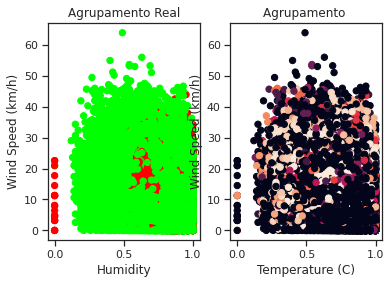

In [79]:
cmap_real = np.array(['red', 'lime', 'black'])
cmap_group = np.array(['purple', 'orange', 'green'])

plt.subplot(1, 2, 1)
plt.scatter(x=df[u'Humidity'], y=df[u'Wind Speed (km/h)'], c=cmap_real[df['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Humidity'], y=df['Wind Speed (km/h)'], c=clustering.labels_, s=40)
plt.title('Agrupamento ')
plt.xlabel('Temperature (C)')
plt.ylabel("Wind Speed (km/h)")

plt.show()

In [83]:
silhouette = metrics.silhouette_score(X,clustering.labels_)
silhouette

-0.47410201121296525